In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [2]:
pwd

'C:\\Users\\akumar5\\Documents\\Python Bootcamp'

In [3]:
df = pd.read_csv("RSCCASN.csv",parse_dates=True,index_col='DATE')

In [4]:
df.columns = ['Sales']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


<AxesSubplot:xlabel='DATE'>

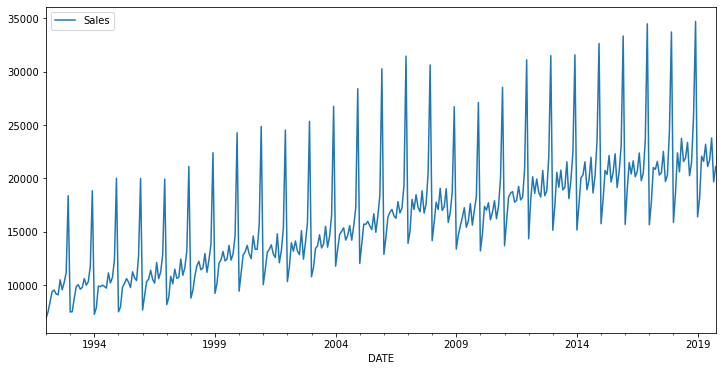

In [7]:
df.plot(figsize=(12,6))

In [8]:
len(df['Sales'])

334

In [9]:
test_length = 18

In [10]:
test_ind = len(df) - test_length

In [11]:
test_ind

316

In [12]:
Train = df.iloc[:test_ind]

In [13]:
Test = df.iloc[test_ind:]

In [14]:
Train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [15]:
Test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [18]:
Scaled_train = scaler.fit_transform(Train)

In [19]:
Scaled_test = scaler.transform(Test)

In [20]:
Scaled_train

array([[-1.72618002e+00],
       [-1.61435199e+00],
       [-1.43286999e+00],
       [-1.25615880e+00],
       [-1.22619805e+00],
       [-1.29795119e+00],
       [-1.31302698e+00],
       [-1.04395271e+00],
       [-1.22333556e+00],
       [-1.09337841e+00],
       [-9.15331399e-01],
       [ 4.60191517e-01],
       [-1.61855031e+00],
       [-1.61435199e+00],
       [-1.37733764e+00],
       [-1.16723071e+00],
       [-1.12982748e+00],
       [-1.21150392e+00],
       [-1.18116151e+00],
       [-1.02200694e+00],
       [-1.13936912e+00],
       [-1.07582179e+00],
       [-8.05984197e-01],
       [ 5.47211279e-01],
       [-1.66091520e+00],
       [-1.54221719e+00],
       [-1.15692574e+00],
       [-1.16684905e+00],
       [-1.14013245e+00],
       [-1.16226906e+00],
       [-1.19242064e+00],
       [-9.21056383e-01],
       [-1.10043923e+00],
       [-1.00254199e+00],
       [-6.92629506e-01],
       [ 7.69531506e-01],
       [-1.61549699e+00],
       [-1.53095805e+00],
       [-1.1

In [21]:
Scaled_test

array([[1.48477289],
       [1.06971152],
       [1.13268635],
       [1.41168392],
       [0.81609471],
       [1.04757491],
       [1.87922431],
       [3.57286553],
       [0.08138838],
       [0.41038415],
       [1.16589126],
       [1.07123818],
       [1.37714318],
       [0.98078343],
       [1.09356562],
       [1.48992538],
       [0.70827417],
       [0.9788751 ]])

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 12

generator = TimeseriesGenerator(Scaled_train, Scaled_train, length=length, batch_size=1)

In [24]:
X,y = generator[0]

In [25]:
X

array([[[-1.72618002],
        [-1.61435199],
        [-1.43286999],
        [-1.2561588 ],
        [-1.22619805],
        [-1.29795119],
        [-1.31302698],
        [-1.04395271],
        [-1.22333556],
        [-1.09337841],
        [-0.9153314 ],
        [ 0.46019152]]])

In [26]:
y

array([[-1.61855031]])

In [27]:
len(X[0])

12

In [28]:
length = 12

validation_generator = TimeseriesGenerator(Scaled_test, Scaled_test, length=length, batch_size=1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, LSTM

In [31]:
n_features = 1

In [32]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,verbose=2)

In [36]:
model.fit_generator(generator, validation_data=validation_generator, epochs=25, callbacks=[early_stop])

Epoch 1/25


C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


304/304 [==============================] - 6s 14ms/step - loss: 0.6666 - val_loss: 0.4970
Epoch 2/25
304/304 [==============================] - 1s 4ms/step - loss: 0.5353 - val_loss: 10.5288
Epoch 3/25
304/304 [==============================] - 1s 4ms/step - loss: 0.3663 - val_loss: 0.1006
Epoch 4/25
304/304 [==============================] - 1s 5ms/step - loss: 0.1499 - val_loss: 0.3383
Epoch 5/25
304/304 [==============================] - 2s 5ms/step - loss: 0.1473 - val_loss: 0.0843
Epoch 6/25
304/304 [==============================] - 2s 6ms/step - loss: 0.0606 - val_loss: 0.0999
Epoch 7/25
304/304 [==============================] - 1s 4ms/step - loss: 0.0359 - val_loss: 0.1294
Epoch 00007: early stopping


In [37]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

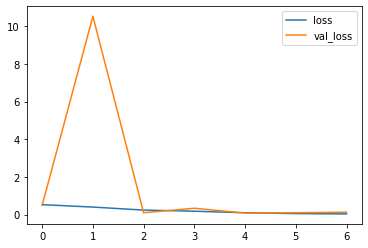

In [38]:
losses.plot()

In [46]:
len(Scaled_train)

316

In [47]:
Scaled_train

array([[-1.72618002e+00],
       [-1.61435199e+00],
       [-1.43286999e+00],
       [-1.25615880e+00],
       [-1.22619805e+00],
       [-1.29795119e+00],
       [-1.31302698e+00],
       [-1.04395271e+00],
       [-1.22333556e+00],
       [-1.09337841e+00],
       [-9.15331399e-01],
       [ 4.60191517e-01],
       [-1.61855031e+00],
       [-1.61435199e+00],
       [-1.37733764e+00],
       [-1.16723071e+00],
       [-1.12982748e+00],
       [-1.21150392e+00],
       [-1.18116151e+00],
       [-1.02200694e+00],
       [-1.13936912e+00],
       [-1.07582179e+00],
       [-8.05984197e-01],
       [ 5.47211279e-01],
       [-1.66091520e+00],
       [-1.54221719e+00],
       [-1.15692574e+00],
       [-1.16684905e+00],
       [-1.14013245e+00],
       [-1.16226906e+00],
       [-1.19242064e+00],
       [-9.21056383e-01],
       [-1.10043923e+00],
       [-1.00254199e+00],
       [-6.92629506e-01],
       [ 7.69531506e-01],
       [-1.61549699e+00],
       [-1.53095805e+00],
       [-1.1

In [50]:
Scaled_train[-length:]

array([[ 1.07295568],
       [ 0.82792635],
       [ 0.86857374],
       [ 1.25043019],
       [ 0.71304499],
       [ 0.82506385],
       [ 1.6133942 ],
       [ 3.38470437],
       [-0.01956218],
       [ 0.49644975],
       [ 1.22524026],
       [ 0.88403119]])

In [53]:
len(Test)

18

In [54]:
Train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [55]:
Test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [58]:
test_predictions = []

length = 12

first_eval_batch = Scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(Test)):

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [61]:
test_predictions

[array([1.2428169], dtype=float32),
 array([1.088579], dtype=float32),
 array([1.1340002], dtype=float32),
 array([1.4869255], dtype=float32),
 array([1.0832081], dtype=float32),
 array([1.1990505], dtype=float32),
 array([2.2017725], dtype=float32),
 array([3.774062], dtype=float32),
 array([0.25344652], dtype=float32),
 array([0.94135755], dtype=float32),
 array([1.5344377], dtype=float32),
 array([1.312228], dtype=float32),
 array([1.6054937], dtype=float32),
 array([1.5084467], dtype=float32),
 array([1.5896856], dtype=float32),
 array([2.0173426], dtype=float32),
 array([1.6611013], dtype=float32),
 array([1.8462721], dtype=float32)]

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)

In [63]:
true_predictions

array([[22496.105],
       [21687.87 ],
       [21925.885],
       [23775.28 ],
       [21659.725],
       [22266.762],
       [27521.213],
       [35760.305],
       [17311.617],
       [20916.4  ],
       [24024.252],
       [22859.832],
       [24396.6  ],
       [23888.055],
       [24313.762],
       [26554.766],
       [24687.994],
       [25658.324]], dtype=float32)

In [64]:
Test['Predictions'] = true_predictions

<ipython-input-64-4c2467ae1339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Predictions'] = true_predictions


In [65]:
Test

,Sales,Predictions
DATE,,
2018-05-01,23764,22496.105469
2018-06-01,21589,21687.869141
2018-07-01,21919,21925.884766
2018-08-01,23381,23775.279297
2018-09-01,20260,21659.724609
2018-10-01,21473,22266.761719
2018-11-01,25831,27521.212891
2018-12-01,34706,35760.304688
2019-01-01,16410,17311.617188


<AxesSubplot:xlabel='DATE'>

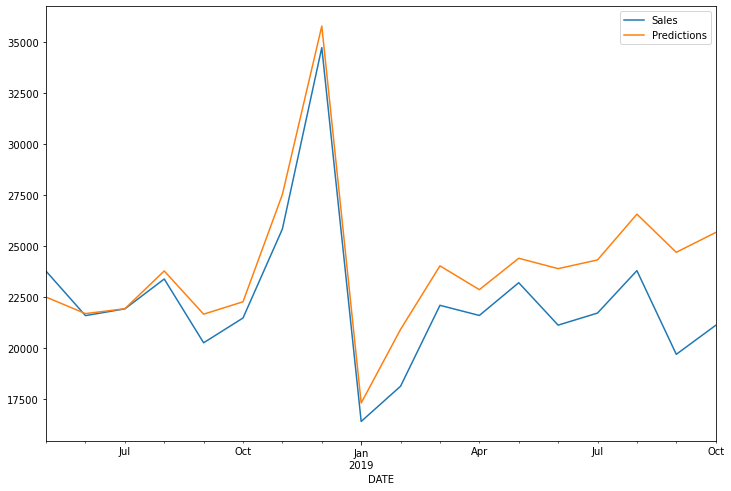

In [67]:
Test.plot(figsize=(12,8))

In [71]:
full_scaler = StandardScaler()

In [72]:
scaled_full_data = full_scaler.fit_transform(df)

In [73]:
length = 12

In [74]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [75]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [77]:
model.fit_generator(generator, epochs=20, verbose=2)

Epoch 1/20
322/322 - 1s - loss: 0.0315
Epoch 2/20
322/322 - 1s - loss: 0.0339
Epoch 3/20
322/322 - 1s - loss: 0.0393
Epoch 4/20
322/322 - 1s - loss: 0.0356
Epoch 5/20
322/322 - 1s - loss: 0.0523
Epoch 6/20
322/322 - 1s - loss: 0.0424
Epoch 7/20
322/322 - 1s - loss: 0.0238
Epoch 8/20
322/322 - 1s - loss: 0.0247
Epoch 9/20
322/322 - 1s - loss: 0.0262
Epoch 10/20
322/322 - 1s - loss: 0.0262
Epoch 11/20
322/322 - 1s - loss: 0.0269
Epoch 12/20
322/322 - 1s - loss: 0.0267
Epoch 13/20
322/322 - 1s - loss: 0.0253
Epoch 14/20
322/322 - 1s - loss: 0.0212
Epoch 15/20
322/322 - 1s - loss: 0.0212
Epoch 16/20
322/322 - 1s - loss: 0.0274
Epoch 17/20
322/322 - 1s - loss: 0.0253
Epoch 18/20
322/322 - 1s - loss: 0.0207
Epoch 19/20
322/322 - 1s - loss: 0.0212
Epoch 20/20
322/322 - 1s - loss: 0.0218


In [78]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

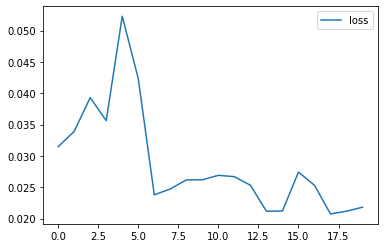

In [79]:
losses.plot()

In [83]:
forecast = []

periods = 12
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [85]:
forecast = full_scaler.inverse_transform(forecast)

In [86]:
forecast

array([[26846.463],
       [35799.16 ],
       [16571.434],
       [18592.646],
       [21689.793],
       [21650.557],
       [23050.791],
       [21212.234],
       [21660.977],
       [23843.168],
       [19683.809],
       [20877.576]], dtype=float32)

In [87]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [97]:
forecast_time_range = pd.date_range(start='2019-11-01',periods=periods, freq='MS')

In [98]:
forecast_time_range

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [101]:
forecast_df = pd.DataFrame(index=forecast_time_range, data=forecast, columns=['Forecast'])

In [102]:
forecast_df

,Forecast
2019-11-01,26846.462891
2019-12-01,35799.160156
2020-01-01,16571.433594
2020-02-01,18592.646484
2020-03-01,21689.792969
2020-04-01,21650.556641
2020-05-01,23050.791016
2020-06-01,21212.234375
2020-07-01,21660.976562
2020-08-01,23843.167969


<AxesSubplot:>

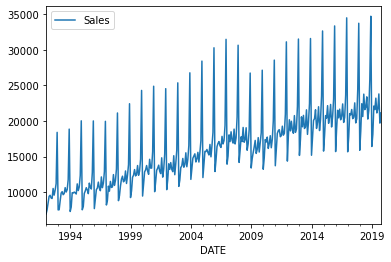

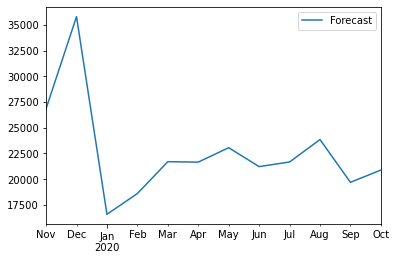

In [103]:
df.plot()
forecast_df.plot()

(552.0, 612.0)

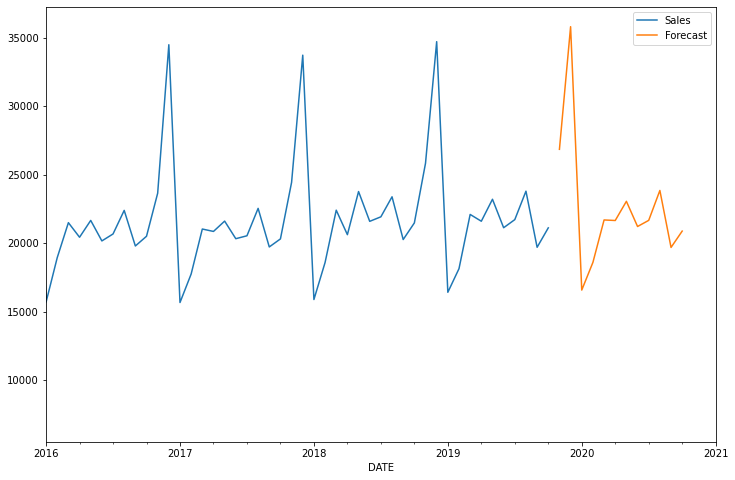

In [114]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))
# plt.xlim('2018-01-01', '2020-12-01')
plt.xlim('2016', '2021')